# Advanced Regression Techniques  - Boston Housing Dataset

## Problem Statement


Although you might think the height of the basement ceiling might not influence the price for of a particular house, basement ceiling along with other factors highly influece house prices.

Performing machine learning processes to model the Boton housing dataset featured on Kaggle.com, our challenge was to predict the house price. 

Given the multidimentionality of features in the Boston data, predicting the house price can be quite difficult since unnecessary features generate noise affecting the accuracy of our regression model. Therefore, cleared the noise proir to implementing our regression model.

--- 
**Team members (Group 9)**
 - Fahdah Alalyan - fahdah.a15@gmail.com   
 - Amjaad Alsubaie - amjaad_636@hotmail.com  
 - Ahmed Adam - am4ma@hotmail.com
 
**Kaggle Kernal,** 
[here](https://www.kaggle.com/fahdahalalyan/advanced-regression-techniques-boston-housing)
 
---


##  Data Wrangling

Let's read the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Kaggle reading data sets.

# train_or = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
# test_or = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
# test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


# -----------------

train_or = pd.read_csv('../data/train.csv')
test_or = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

##  Data Cleaning and Data Exploration
###  Display data

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape # checking shape 
test.shape

(1459, 80)

###  How complete is the data?

Investigating missing values etc.

In [6]:
test.isna().sum() # check null values is not enough, not all the columns appeared.
train.isna().sum() # check null values is not enough, not all the columns appeared.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

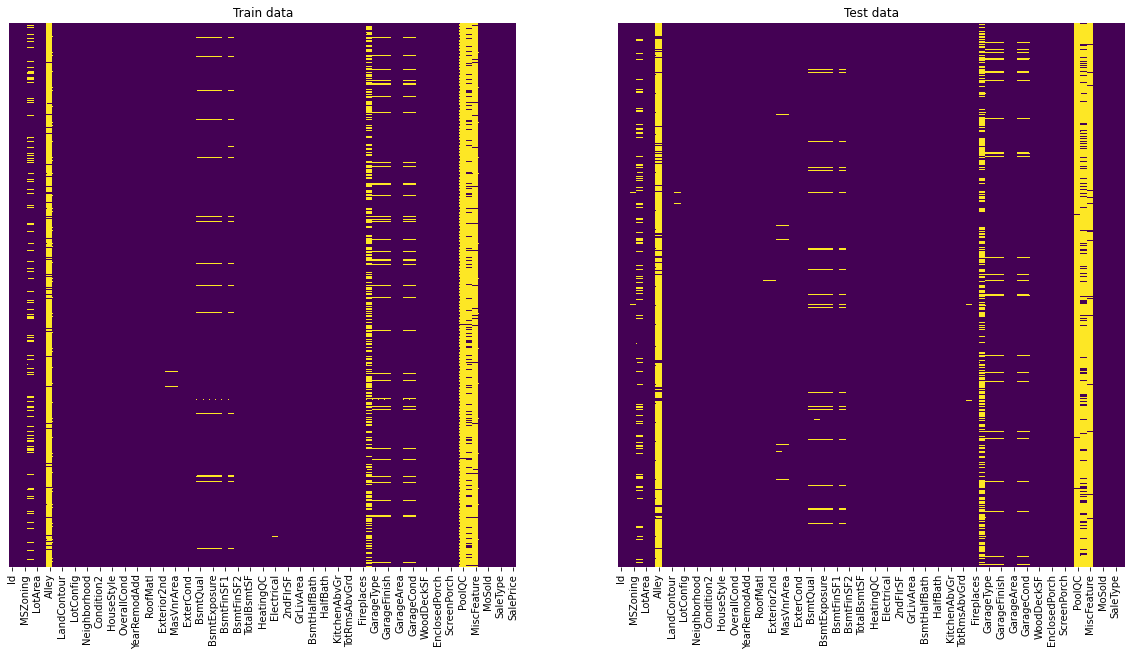

In [7]:
# Another way of visualize null values.
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

### Investigating data types
Displaying the data types of each feature. 

In [8]:
train.info() 
test.info()
# Examination of data description indicates some features which contain categorical values 
# These were displayed as object in the datasets. 
# Therfore, certain features were converted into categorical data type 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###  Data dictionary 

Kindly refer to this link for full data dictionary:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

###  Filling missing data - special cases

In [9]:
train['LotFrontage'].isna().sum() # check null values in LotFrontage columns 
# 259 is a high number, we need to replace the null with a good value that not affect the model.

259

In [10]:
# Using the following function to replace the null values with ava with its Neighborhood.
list_a={}
for i in sorted(train['Neighborhood'].unique()): # for each Neighborhood.
# save it as dictionary type and use it for the following questions.
    list_a[i]= np.mean(train[train['Neighborhood']==i]['LotFrontage']) # Calculate the LotFrontage average for each Neighborhood.
list_a

def impute_lotFrontage(lotFrontage_Neighborhood): # train or test
    # for each Neighborhood, filling missing value in lotFrontage with it's ava.
    for i in train['Neighborhood']: # Neighborhood
        x_mean= list_a[i] # get ava.
        # update and change null values with ava.        
        lotFrontage_Neighborhood.loc[(lotFrontage_Neighborhood['Neighborhood']==i) & (lotFrontage_Neighborhood['LotFrontage'].isna()),'LotFrontage']= list_a[i]
        

In [11]:
# call the function to update train and test.
impute_lotFrontage(train)
impute_lotFrontage(test)
train['LotFrontage'].isna().sum() # check
test['LotFrontage'].isna().sum() # check

0

In [12]:
test.GarageYrBlt.unique() 
# we noticed 'None' value which can not be replaced by 0.0 as float value
# we changed the data type for GarageYrBlt column from float to object to replace it with 'None' as string

array([1961., 1958., 1997., 1998., 1992., 1993., 1990., 1970., 1999.,
       1971., 1975., 2009., 2005., 2003., 2002., 2006., 2004., 1920.,
       1974., 2000., 2010., 1967., 1978., 1966., 1964.,   nan, 1994.,
       1949., 1959., 1956., 1952., 1955., 1989., 1950., 1960., 1963.,
       1900., 1957., 1938., 1948., 1962., 1928., 1930., 1926., 1939.,
       1973., 1942., 1979., 1923., 1915., 1917., 1940., 1910., 1969.,
       1968., 1977., 1945., 1987., 1947., 1954., 1941., 1951., 1896.,
       1976., 2008., 2007., 1965., 2001., 1972., 1984., 1985., 1996.,
       1995., 1980., 1986., 1981., 1982., 1991., 1988., 1953., 1924.,
       1927., 1946., 1934., 1983., 1916., 1918., 1937., 1932., 1935.,
       1925., 1921., 1895., 1922., 2207., 1936., 1943., 1919.])

In [13]:
test['GarageArea'].isna().sum() 
test.loc[test['GarageArea'].isna()][['GarageArea', 'GarageYrBlt', 'GarageFinish']] # getting rows with null in GarageArea
# Checking values for GarageYrBlt and GarageFinish 

,GarageArea,GarageYrBlt,GarageFinish
1116,NaN,NaN,NaN


In [14]:
test.loc[test['GarageArea'] == 0.0][['GarageArea', 'GarageYrBlt', 'GarageFinish']]
# getting rows with 0.0 in GarageArea
# Checking values for GarageYrBlt and GarageFinish 

,GarageArea,GarageYrBlt,GarageFinish
53,0.0,NaN,NaN
71,0.0,NaN,NaN
79,0.0,NaN,NaN
92,0.0,NaN,NaN
96,0.0,NaN,NaN
...,...,...,...
1433,0.0,NaN,NaN
1449,0.0,NaN,NaN
1453,0.0,NaN,NaN
1454,0.0,NaN,NaN


- When GarageArea feet equals to 0.0 that means no Garage as shown in GarageFinish values. 
- Therefore, Garage year built column should has ‘None’ as string. 
- Null values in GarageArea should be equal to 0.0 and Garage year built column equal to ’None’ as string 

In [15]:
test.GarageArea.value_counts() # float, 0 , highest
test.GarageArea.isna().sum() # there are null values in test.
test['GarageArea'] = test['GarageArea'].fillna(0)  #replace it.
test.GarageArea.isna().sum() # to check. 

0

In [16]:
# chaning data type from float to object
train['GarageYrBlt'] = train['GarageYrBlt'].astype(object)
test['GarageYrBlt'] = test['GarageYrBlt'].astype(object) 

In [17]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna('None')  # replace with 'None'
test.GarageYrBlt.isna().sum() # checking null

0

In [18]:
train['GarageYrBlt'] =train['GarageYrBlt'].fillna('None') 
train.GarageYrBlt.isna().sum() # checking null 

0

###  Filling missing data

|Data type|Action|Condition|
|:-|:-|:-|
|int/float|Fill with mean|If normal distribution|
|int/float|Fill with most frequent value|If not normal distribution|
|object|Replace with 'None' as a string|If indicated by data discription, e.g. 'NA','No garage'|
|object|Fill with most frequent value|If not indicated by data discription|

####  - Filling missing data (object - fill with most frequent value)

In [19]:
test.Exterior1st.value_counts() # get the highest value to replace it with nan. (VinylSd    510).
test.Exterior1st.isna().sum()  # get the number of null value.
test['Exterior1st'] = test['Exterior1st'].fillna('VinylSd')  #replace it.
test.Exterior1st.value_counts() # to check. (VinylSd    511)

VinylSd    511
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [20]:
# performing the same to Exterior2nd.
test.Exterior2nd.value_counts() # get the highest value to replace it with nan. (VinylSd    510).
test.Exterior2nd.isna().sum()  # get the number of null value.
test['Exterior2nd'] = test['Exterior2nd'].fillna('VinylSd')  #replace it.
test.Exterior2nd.value_counts() # to check. (VinylSd    511)



VinylSd    511
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [21]:
train.Electrical.value_counts() # get the highest value to replace it with nan. (SBrkr    1334).
train.Electrical.isna().sum()  # get the number of null value.
train['Electrical'] = train['Electrical'].fillna('SBrkr')  #replace it.
train.Electrical.value_counts() # to check. (SBrkr    1335)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
test.MSZoning.value_counts() # get the highest value to replace it with nan. (RL         1114).
test.MSZoning.isna().sum()  # get the number of null value.
test['MSZoning'] = test['MSZoning'].fillna('RL')  #replace it.
test.MSZoning.value_counts() # to check. (RL         1118)



RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [23]:
test.KitchenQual.value_counts() # get the highest value to replace it with nan. (TA    757).
test.KitchenQual.isna().sum()  # get the number of null value.
test['KitchenQual'] = test['KitchenQual'].fillna('TA')  #replace it.
test.KitchenQual.value_counts() # to check. (TA    758)


TA    758
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [24]:
test.Functional.value_counts() # get the highest value to replace it with nan. (Typ     1357).
test.Functional.isna().sum()  # get the number of null value.
test['Functional'] = test['Functional'].fillna('Typ')  #replace it.
test.Functional.value_counts() # to check. (Typ     1359)

Typ     1359
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

####  - Filling missing data (int / float - fill with most frequent value)

In [25]:
test['BsmtUnfSF'].skew() # postive skew, it is not normal distribution

0.919916339164844

In [26]:
test.BsmtUnfSF.value_counts() # highest is (0.0     124)
test.BsmtUnfSF.isna().sum() # there is a null value in test.
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0.0)  #replace it.
test.BsmtUnfSF.isna().sum() # to check.

0

In [27]:
test['MasVnrArea'].skew() # positive skew, it is not normal distribution

2.533376725976824

In [28]:
train['MasVnrArea'].skew() # positive skew, it is not normal distribution

2.669084210182863

In [29]:
train.MasVnrArea.value_counts() # float, 0 , highest
train.MasVnrArea.unique()
train.MasVnrArea.isna().sum() # there are null values in train, it should be replaced with 0 as a highest value.
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)  #replace it.
train.MasVnrArea.isna().sum() # to check.


test.MasVnrArea.value_counts() # float, 0 , highest
test.MasVnrArea.isna().sum() # there are null values in test.
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)  #replace it.
test.MasVnrArea.isna().sum() # to check.


0

In [30]:
test['TotalBsmtSF'].skew() # postive skew, it is not normal distribution

0.8135891485362542

In [31]:
test.TotalBsmtSF.value_counts() # highest is (0.0     41)
test.TotalBsmtSF.isna().sum() # there is a null value in test.
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0.0)  #replace it.
test.TotalBsmtSF.isna().sum() # to check.

0

In [32]:
test['GarageCars'].skew() # negative skew, it is not normal distribution

-0.10714151559186293

In [33]:
test.GarageCars.value_counts() # highest is (2.0    770)
test.GarageCars.isna().sum() # there is a null value in test.
test['GarageCars'] = test['GarageCars'].fillna(2.0)  #replace it.
test.GarageCars.isna().sum() # to check.

0

In [34]:
test['BsmtHalfBath'].skew() # positive skew, it is not normal distribution 

3.7798662749477145

In [35]:
test.BsmtHalfBath.value_counts() # float, 0 , highest
test.BsmtHalfBath.isna().sum() # there are null values in test.
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)  #replace it.
test.BsmtHalfBath.isna().sum() # to check. 

0

In [36]:
train['BsmtFinSF1'].skew() # positive skew, it is not normal distribution 

1.685503071910789

In [37]:
test.BsmtFinSF1.value_counts() # # int, 0 , highest
test.BsmtFinSF1.isna().sum() # there is a null value in test.
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)  #replace it.
test.BsmtFinSF1.isna().sum() # to check.

0

In [38]:
test['BsmtFullBath'].skew() # positive skew, it is not normal distribution 

0.6496980738272737

In [39]:
test.BsmtFullBath.value_counts() # float, 0 , highest
test.BsmtFullBath.isna().sum() # there are null values in test.
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)  #replace it.
test.BsmtFullBath.isna().sum() # to check.

0

In [40]:
test['BsmtFinSF2'].skew() # positive skew, it is not normal distribution 

4.04134463064927

In [41]:
test.BsmtFinSF2.value_counts() # # int, 0 , highest
test.BsmtFinSF2.isna().sum() # there is a null value in test.
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0)  #replace it.
test.BsmtFinSF2.isna().sum() # to check.

0

####  - Filling missing data (object - fill with most frequent value)

In [42]:
test.MasVnrType.value_counts()  # get the highest value to replace it with nan. (None       878).
test.MasVnrType.isna().sum()  # get the number of null value.
test['MasVnrType'] = test['MasVnrType'].fillna('None')  #replace it.
test.MasVnrType.value_counts() # to check. (None       894)

None       894
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [43]:
test.SaleType.value_counts()  # get the highest value to replace it with nan. (WD       1258).
test.SaleType.isna().sum()  # get the number of null value.
test['SaleType'] = test['SaleType'].fillna('WD')  #replace it.
test.SaleType.value_counts() # to check. (WD       1259)

WD       1259
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

####  - Filling missing data (object - replace with 'None' as a string)  

In [44]:
# change null values with none exist. (Catogrical values)

train['GarageType'] = train['GarageType'].fillna('None') 
test['GarageType'] = test['GarageType'].fillna('None') 

test['GarageFinish'] = test['GarageFinish'].fillna('None') 
train['GarageFinish'] = train['GarageFinish'].fillna('None') 

train['MasVnrType'] = train['MasVnrType'].fillna('None') 
test['MasVnrType'] = test['MasVnrType'].fillna('None') 

test['GarageQual'] = test['GarageQual'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None') 

train['GarageCond'] = train['GarageCond'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None') 


#-----------------------

train['PoolQC'] = train['PoolQC'].fillna('None') 
test['PoolQC'] = test['PoolQC'].fillna('None') 

train['MiscFeature'] = train['MiscFeature'].fillna('None') 
test['MiscFeature'] = test['MiscFeature'].fillna('None') 

train['Alley'] = train['Alley'].fillna('None') 
test['Alley'] = test['Alley'].fillna('None') 

train['BsmtCond'] = train['BsmtCond'].fillna('None') 
test['BsmtCond'] = test['BsmtCond'].fillna('None') 

train['BsmtExposure'] = train['BsmtExposure'].fillna('None') 
test['BsmtExposure'] = test['BsmtExposure'].fillna('None') 

train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None') 
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None') 


train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None') 
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None') 

train['BsmtQual'] = train['BsmtQual'].fillna('None') 
test['BsmtQual'] = test['BsmtQual'].fillna('None') 

train['FireplaceQu'] = train['FireplaceQu'].fillna('None') 
test['FireplaceQu'] = test['FireplaceQu'].fillna('None') 

train['FireplaceQu'] = train['FireplaceQu'].fillna('None') 
test['FireplaceQu'] = test['FireplaceQu'].fillna('None') 

train['Fence'] = train['Fence'].fillna('None') 
test['Fence'] = test['Fence'].fillna('None') 

####  - Dropping unnecessary columns

In [45]:
# most the values are same except null values which are few values compared to non-null values.
train.Street.value_counts()      # (Pave    1454, Grvl       6)
train.Utilities.value_counts()   # (AllPub    1459, NoSeWa       1)

train = train.drop(["Street", "Utilities"], axis=1)

# Removing columns from train requires removing the same columns from test. 
test = test.drop(["Street", "Utilities"], axis=1)

####  - Visualization of missing values (re-check)

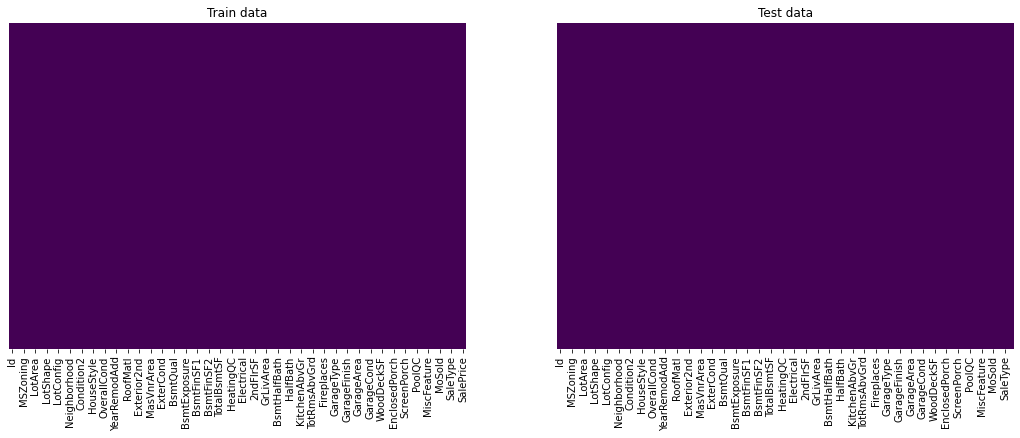

In [46]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

####  - Statistical Measures
- Note: since there are 37 features, not all columns are displayed using .describe()
- However, from displayed dataframe below, outliers can be noticed in different columns

In [47]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.725218,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.426978,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.083333,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [48]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,69.316611,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,438.902673,...,472.444825,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,20.955515,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.257119,...,217.326902,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,317.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,70.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [49]:
train['SalePrice'].describe() # obtaining statistical measures for the target column
# we noticed that there are at least one outlier at min and max levels

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

####  - Visualization 

/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

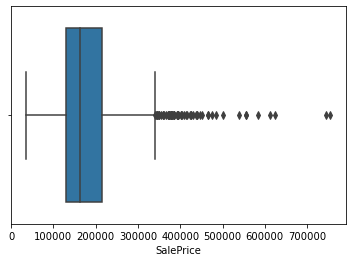

In [50]:
sns.boxplot(train['SalePrice']) # there are outliers, however, it will not affect the prediction since it will be used as target

/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

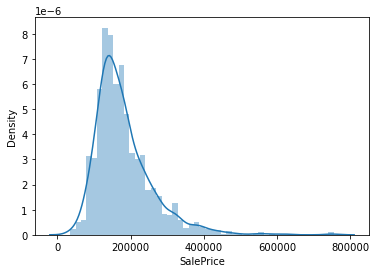

In [51]:
sns.distplot(train['SalePrice']) # checkin distrubution of target column. It appears that it is not a normal distribution

In [52]:
# Positive Skeweness:
train['SalePrice'].skew()

1.8828757597682129

Text(0.5, 1.0, 'Correlation Between Features')

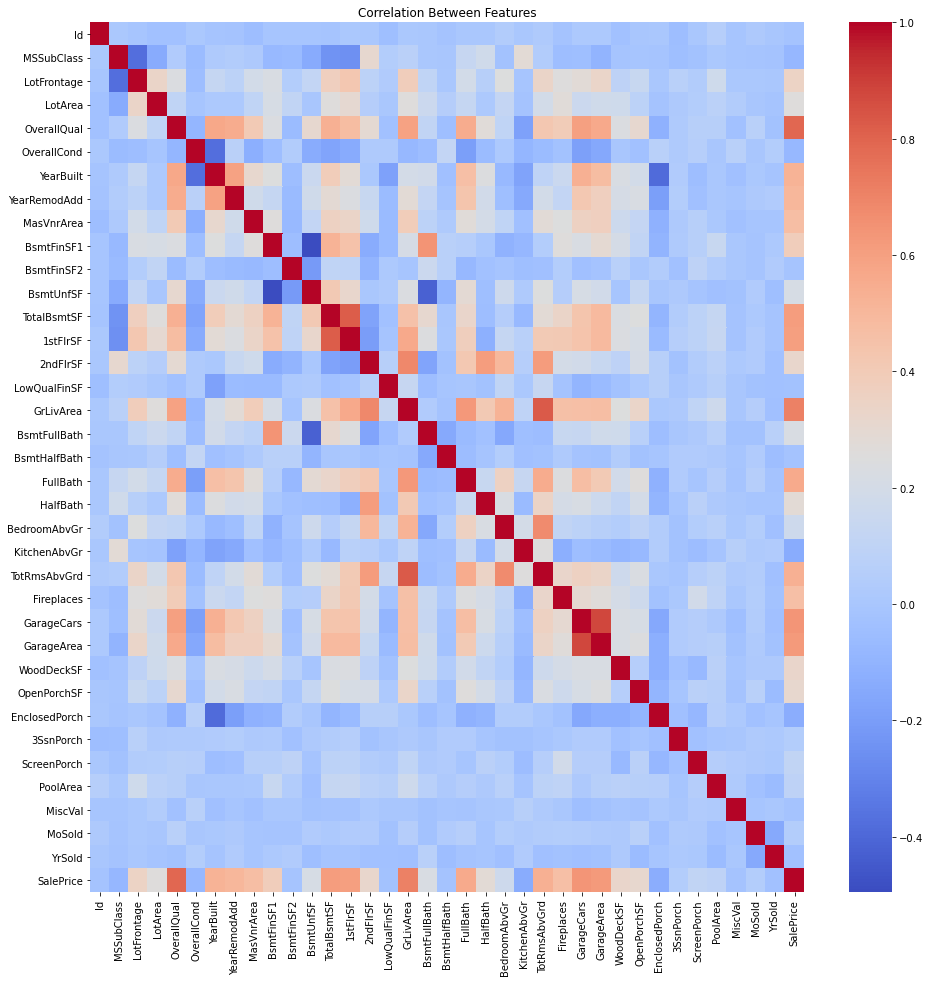

In [53]:
# plotting heatmap to identify correlations
fig, ax = plt.subplots(figsize = (16,16))
sns.heatmap(train.corr(), cmap = 'coolwarm')
ax.set_title('Correlation Between Features')

 - Since salePrice is our target, the highest observed correlation exist with 'OverallQual' and 'GrLivArea' 

In [54]:
# checking degree of correlation between SalePrice, OverallQual and GrLivArea  
train[['SalePrice','OverallQual','GrLivArea']].corr()

,SalePrice,OverallQual,GrLivArea
SalePrice,1.000000,0.790982,0.708624
OverallQual,0.790982,1.000000,0.593007
GrLivArea,0.708624,0.593007,1.000000


/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'OverallQual vs SalePrice')

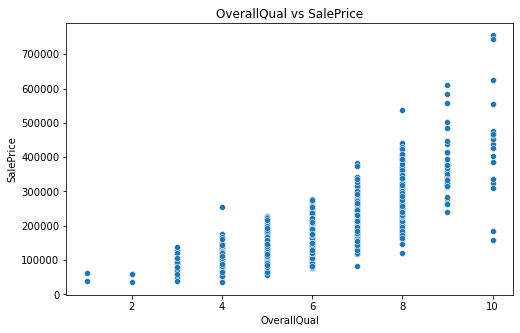

In [55]:
# Visualizing OverallQual vs SalePrice 
plt.figure(figsize=(8, 5))
sns.scatterplot(train["OverallQual"], train["SalePrice"])
plt.title("OverallQual vs SalePrice")

/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

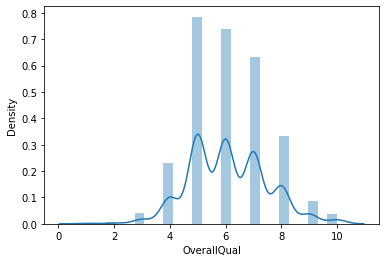

In [56]:
# Visualizing dsitrbution of OverallQual
sns.distplot(train['OverallQual'])

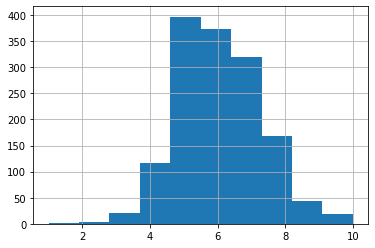

In [57]:
# plotting histogram for OverallQual
train.OverallQual.hist();

In [58]:
train['OverallQual'].skew() # checking skewness

0.2169439277628693

/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GrLivArea vs SalePrice')

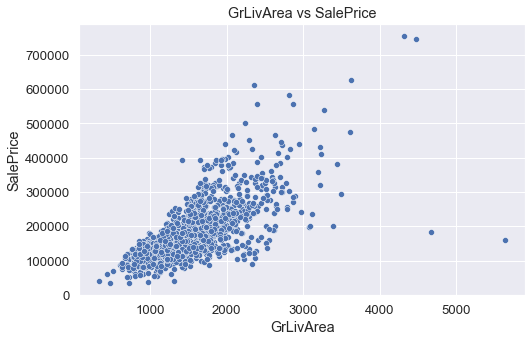

In [59]:
# Visualization of GrLivArea vs SalePrice
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
sns.scatterplot(train["GrLivArea"], train["SalePrice"])
plt.title("GrLivArea vs SalePrice")

In [60]:
# We noticed that outliers could be removed using the plot
# if we could not get a good prediction score without removing outliers,
#this method could be applied to remove outliers 
train_clean= train.drop(train[(train['GrLivArea']>4000)].index) # drop outliers from GrLivArea column.

/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


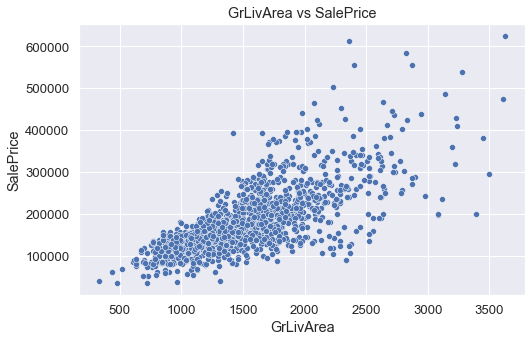

In [61]:
# plotting GrLivArea vs SalePrice without outliers
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
sns.scatterplot(train_clean["GrLivArea"], train_clean["SalePrice"])
plt.title("GrLivArea vs SalePrice");

#####  - Visualizing outliers using boxplot

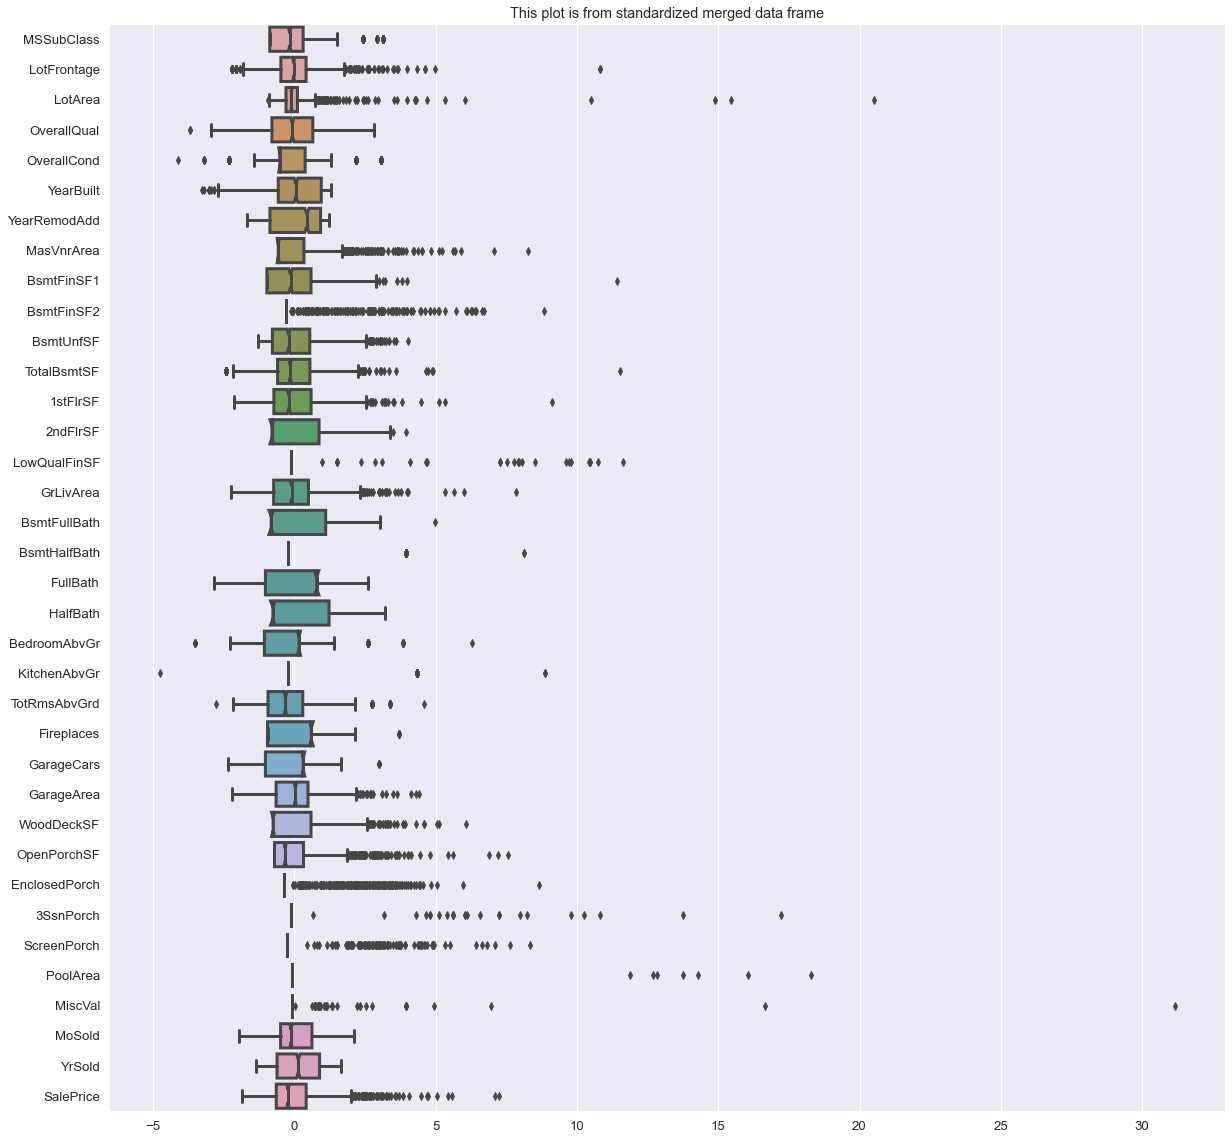

In [62]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

box_plots = var_standardized(
    train.select_dtypes(exclude=['object']).drop(['Id'], axis=1)) # only numeric columns and drop year. 

fig,ax=plt.subplots(figsize=(20,20)) # create figure with specific size  
sns.boxplot(data=box_plots, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax) # plot 
plt.title('This plot is from standardized merged data frame'); # title.

####  - Dummies

In [63]:
train_dum = pd.get_dummies(train,drop_first=True) # converting categorical values into dummies  

test_dum = pd.get_dummies(test, drop_first=True) # converting categorical values into dummies  

test_dum.info() # test columns =!  train columns

print(train_dum.shape) # since columns are not equal, will have to concatinate then split by id to match kaggle submission file
print(test_dum.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 337 entries, Id to SaleCondition_Partial
dtypes: float64(10), int64(26), uint8(301)
memory usage: 839.3 KB
(1460, 355)
(1459, 337)


In [64]:
# Since above dummies result in different number of columns between train and test, 
# concatinating without Id column can be a solution
# dropping Id column
train = train.drop("Id", axis=1)
test = test.drop("Id", axis=1)
# concatinating
concat_1 = pd.concat((train.loc[:,:], test.loc[:, :])).reset_index(drop=True)
concat_1 = concat_1.drop(["SalePrice"], axis = 1) # to remove null values in concat_1['SalePrice'] which resulted from concatination
concat_1.tail() # check

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,160,RM,21.0,1936,None,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,None,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,None,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,None,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal
2918,60,RL,74.0,9627,None,Reg,Lvl,Inside,Mod,Mitchel,...,0,0,None,None,None,0,11,2006,WD,Normal


In [65]:
concat_1.shape # checking length of concat_1 = len(test) + len(train)

(2919, 77)

In [66]:
concat_dum = pd.get_dummies(concat_1) # applying dummies to concat_1

In [67]:
concat_dum # displaying to check

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


##  Modeling

 - spliting concatinated df (concat_1) to get back train and test with dummies

In [68]:
# spliting after getting dumies to match kaggle submission file
X_train_out = concat_1.iloc[:len(train),:]
X_test_out = concat_1.iloc[len(X_train_out):,:]
print(len(X_test_out) == len(test)) # check
print(len(X_train_out) == len(train)) # check

True
True


In [69]:
print(X_train_out.shape) # checking shape
print(X_test_out.shape)

(1460, 77)
(1459, 77)


In [70]:
# initializing scaler for needed model
scaler = StandardScaler()

#### Logistic Regression Model:

In [71]:
# logistic reg with the all columns.
# only numeric columns.
# without removing outliers.

scaler = StandardScaler() #initializing scaler
y = train['SalePrice'] # get target
Xss = scaler.fit_transform(X_train_out.select_dtypes(exclude=['object'])) # only numeric columns.
test_ss = scaler.transform(X_test_out.select_dtypes(exclude=['object'])) # only numeric columns.

logreg = LogisticRegression() #initializing logreg ()
logreg.fit(Xss, y)
print('train score: ',logreg.score(Xss,y)) 

# Kaggle Submission 

pred = logreg.predict(test_ss)
test_or['SalePrice']= pred
# # Save the prediction into a file that matches the Kaggle submission requirements
test_or[['Id', 'SalePrice']].to_csv('../output data/submission_logReg_outliers.csv',index=False)

train score:  0.6787671232876712


/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 - submitting above prediction to Kaggle resulted in score = 0.22758 

In [72]:
# logistic reg with lasso.
# logistic reg with the all columns.
# only numeric columns.
# without removing outlers.

scaler = StandardScaler() #initializing scaler
y = train['SalePrice'] 
Xss = scaler.fit_transform(X_train_out.select_dtypes(exclude=['object'])) 
test_ss = scaler.transform(X_test_out.select_dtypes(exclude=['object']))

logreg = LogisticRegression(penalty='l2') # using lasso results in the same score as above (0.22758) because logreg applies lasso by default 
logreg.fit(Xss, y)
print('train score: ',logreg.score(Xss,y)) 

# Kaggle Submission 

pred = logreg.predict(test_ss)
test_or['SalePrice']= pred
# # Save the prediction into a file that matches the Kaggle submission requirements
test_or[['Id', 'SalePrice']].to_csv('../output data/submission_logReg_outliers_Lasso.csv',index=False)

train score:  0.6787671232876712


/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 - submitting above prediction to Kaggle resulted in score = 0.22758 because logreg applies lasso by default 

#### Random Forest Trees

In [73]:
# RF.
# RF with the all columns.
# only numeric columns.
# without removing outliers

rf = RandomForestRegressor()

rf.fit(X_train_out.select_dtypes(exclude=['object']), y)

print('train score: ',rf.score(X_train_out.select_dtypes(exclude=['object']),y)) 

# Kaggle Submission 

pred = rf.predict(X_test_out.select_dtypes(exclude=['object']))
test_or['SalePrice']= pred

# # # Save the prediction into a file that matches the Kaggle submission requirements
test_or[['Id', 'SalePrice']].to_csv('../output data/submission_RF_outliers_allcol.csv',index=False)

train score:  0.9790984159875589


 - submitting above prediction to Kaggle resulted in score = 0.19876 

In [74]:
# RF. # cv=10 # n_estimators=100
# RF with the all columns.
# only numeric columns.
# without removing outliers
rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train_out.select_dtypes(exclude=['object']), y)

s = cross_val_score(rf, X_train_out.select_dtypes(exclude=['object']), y, cv=10, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Random Forest", "Train", s.mean().round(3)))

# Kaggle Submission 

pred = rf.predict(X_test_out.select_dtypes(exclude=['object']))
test_or['SalePrice']= pred
# # # # Save the prediction into a file that matches the Kaggle submission requirements
test_or[['Id', 'SalePrice']].to_csv('../output data/submission_RF_outliers_allcol_estimators_cv.csv',index=False)


Random Forest Train Score:	0.857 


 #### Best score:
 - submitting above prediction to Kaggle resulted in score = 0.14835 

In [75]:
# RF. # grid search # cv 

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rfkkkkkk = RandomForestRegressor(n_estimators=100)
gs = GridSearchCV(estimator = rfkkkkkk, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gs.fit(X_train_out.select_dtypes(exclude=['object']), y)
gs.score(X_train_out.select_dtypes(exclude=['object']),y)
pred = gs.predict(X_test_out.select_dtypes(exclude=['object']))
test_or['SalePrice']= pred
# # # # Save the prediction into a file that matches the Kaggle submission requirements
test_or[['Id', 'SalePrice']].to_csv('../output data/submission_RF_outliers__GS_cv.csv',index=False)

print('train score: ', gs.score(X_train_out.select_dtypes(exclude=['object']),y))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.6min finished


train score:  0.917395613365311


 - submitting above prediction to Kaggle resulted in score = 0.16460 

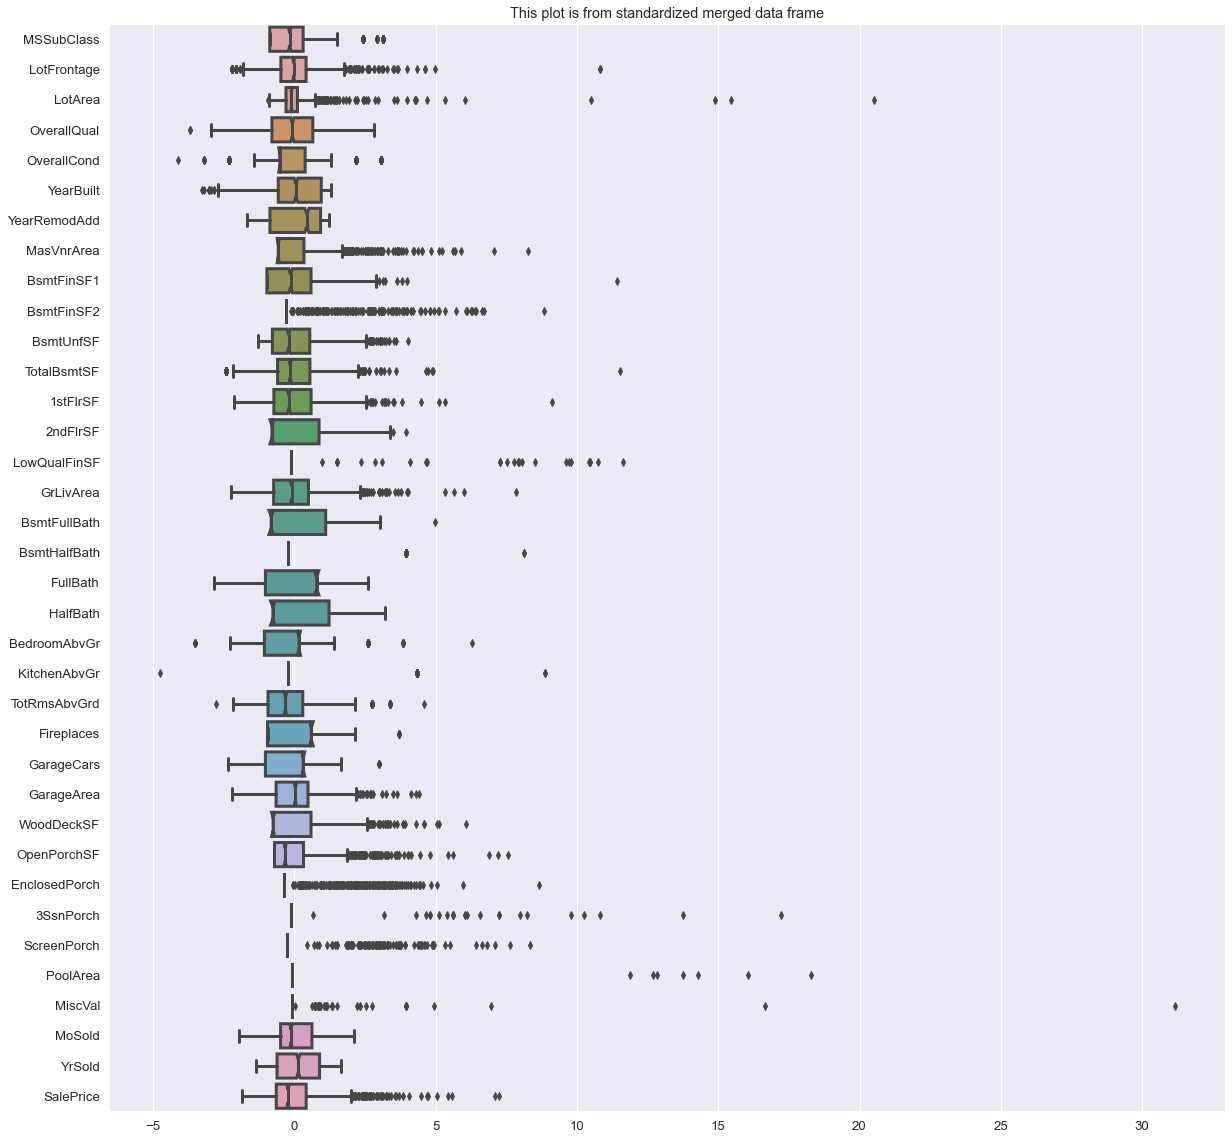

In [76]:
box_plots = var_standardized(
    train_dum.select_dtypes(exclude=['object','uint8']).drop(['Id'], axis=1)) # only numeric columns and drop year. 

fig,ax=plt.subplots(figsize=(20,20)) # create figure with specific size  
sns.boxplot(data=box_plots, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax) # plot 
plt.title('This plot is from standardized merged data frame'); # title.

#### scores worst to best 
 - logRq:       0.22
 - RF normal:   0.19
 - GS,RF,CV:    0.16
 - RF CV:       0.14 (best score)

### Concluding remarks


In this expermint we predected the house prices using different regression models. This data was challenging since it contained many missing values. Dealing effectively with missing values (ie. replacing them with meaningful values), enabled us to predict house prices to a reasonably good prediction accuracy. We can see that Random Forest Regressor with cross validation, K-Fold=10 results in the best prediction score = 0.14


#### Score optimazation recommendations: 
- Accuracy of our score can be further improved by removing extra noise that might be caused by existing outliers
- we recommend experimenting with advanced regression technique such as gradient boosting and compare results.
- Creating extra columns via feature engineering might lead a better prediction accuracy. Example: house age can be added as an extra column using year built column.  
